In [1]:
%matplotlib inline
import xmitgcm
import xgcm
import xarray as xr

import plot_tracer as pltr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load mitgcm output where \kappa_{redi}=50
datadir='tracer/kh_50'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2','layersDiags']
dslayers=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
grid = xgcm.Grid(dslayers, periodic=['X'])
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [dslayers[name] for name in names]
all_tracers50 = xr.concat(all_tracer_list, dim='tracer')


In [3]:
#load mitgcm output where \kappa_{redi}=500
datadir='tracer/kh_500'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracers500 = xr.concat(all_tracer_list, dim='tracer')


In [4]:
#load mitgcm output where \kappa_{redi}=5000
datadir='tracer/kh_5000'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracers5000 = xr.concat(all_tracer_list, dim='tracer')


In [5]:
#load mitgcm output where \kappa_v=2 \times 10^{-3}
datadir='tracer/kv_3'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracerskv3 = xr.concat(all_tracer_list, dim='tracer')

In [6]:
#load mitgcm output where \kappa_v=2 \times 10^{-4}
datadir='tracer/kv_4'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracerskv4 = xr.concat(all_tracer_list, dim='tracer')

In [7]:
#load mitgcm output where \kappa_v=2 \times 10^{-5}
datadir='tracer/kv_5'
iters=range(54150000,54300000,150000)
prefixes=['tracer1','tracer2']
ds=xmitgcm.open_mdsdataset(datadir,prefix=prefixes,iters=iters)
names = ["TRAC01","TRAC02","TRAC03","TRAC04","TRAC05","TRAC06","TRAC07","TRAC08","TRAC09","TRAC10","TRAC11"]#list(ds.data_vars)
all_tracer_list = [ds[name] for name in names]
all_tracerskv5 = xr.concat(all_tracer_list, dim='tracer')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


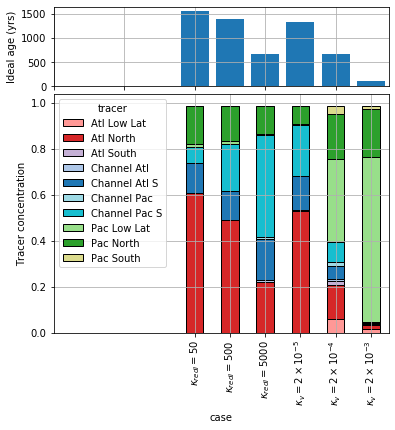

In [8]:
all_tracer=xr.concat([all_tracers50, all_tracers500, all_tracers5000,all_tracerskv5,all_tracerskv4,all_tracerskv3],'case')
deepPac= ((all_tracer.mean('time') * ds.drF *ds.rA).isel(tracer=slice(0,10)).where(ds.XC<140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z'])/((ds.drF *ds.rA.where(ds.XC<140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z']))
deepPac['tracer']=["Atl North","Pac North","Atl Low Lat","Pac Low Lat","Atl South","Pac South","Channel Atl","Channel Pac","Channel Atl S","Channel Pac S"]
deepPac['case']=['50','500','5000','kva5','kvb4','kvc3']
deepPacAge=((all_tracer.mean('time') * ds.drF *ds.rA).isel(tracer=10).where(ds.XC<140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z'])/((ds.drF *ds.rA.where(ds.XC<140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z']))
deepPacAge['case']=['50','500','5000','kv5','kv4','kv3']
seriesPac = deepPac.to_series()
fig, (ax1, ax2)  = plt.subplots(2,1,figsize=(6,6), gridspec_kw = {'height_ratios':[1, 3]})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax1.bar(np.arange(0,6),deepPacAge.values/24/365/3600)
ax1.set_xlim(-4, 5.5)
ax1.set_yticks(np.arange(0,2000,500))
ax1.grid(True)
ax1.set_ylabel('Ideal age (yrs)')
ax1.set_xticklabels((r'', r'', r'', r' ', r'',r''))
#plt.xticks(rotation=90)

series2Pac=seriesPac.reset_index(name='tracerint').groupby(['tracer','case'])['tracerint'].sum().unstack('tracer').fillna(0)
#series2
cmap = plt.cm.get_cmap('tab20')
series2Pac.plot(kind='bar',ax=ax2,stacked='True', edgecolor='black',color=[cmap(7),cmap(6),cmap(9),cmap(1),cmap(0),cmap(19),cmap(18),cmap(5),cmap(4),cmap(17)])
plt.grid(True)
plt.xlim(-4, 5.5)
ax2.set_ylabel('Tracer concentration')
ax2.set_xticklabels((r'$\kappa_{redi}=50$', r'$\kappa_{redi}=500$', r'$\kappa_{redi}=5000$', r' $\kappa_v=2 \times10^{-5}$', r'$ \kappa_v=2 \times10^{-4}$',r'$\kappa_v=2 \times10^{-3}$'))
fig = plt.gcf()
fig.savefig('../tracer_figs/barchart_deepNP.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


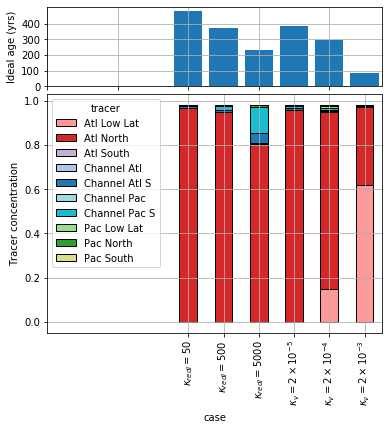

In [13]:
#barchart for north Atlantic
all_tracer=xr.concat([all_tracers50, all_tracers500, all_tracers5000,all_tracerskv5,all_tracerskv4,all_tracerskv3],'case')
deepAtl= ((all_tracer.mean('time') * ds.drF *ds.rA).isel(tracer=slice(0,10)).where(ds.XC>140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z'])/((ds.drF *ds.rA.where(ds.XC>140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z']))
deepAtl['tracer']=["Atl North","Pac North","Atl Low Lat","Pac Low Lat","Atl South","Pac South","Channel Atl","Channel Pac","Channel Atl S","Channel Pac S"]
deepAtl['case']=['50','500','5000','kva5','kvb4','kvc3']
deepAtlAge=((all_tracer.mean('time') * ds.drF *ds.rA).isel(tracer=10).where(ds.XC>140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z'])/((ds.drF *ds.rA.where(ds.XC>140).where(ds.Z<-2000).where(ds.YC>0)).sum(dim=['XC','YC','Z']))
deepAtlAge['case']=['50','500','5000','kv5','kv4','kv3']
seriesAtl = deepAtl.to_series()
fig, (ax1, ax2)  = plt.subplots(2,1,figsize=(6,6), gridspec_kw = {'height_ratios':[1, 3]})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax1.bar(np.arange(0,6),deepAtlAge.values/24/365/3600)
ax1.set_xlim(-4, 5.5)
ax1.set_yticks(np.arange(0,500,100))
ax1.grid(True)
ax1.set_ylabel('Ideal age (yrs)')
ax1.set_xticklabels((r'', r'', r'', r' ', r'',r''))
#plt.xticks(rotation=90)

series2Atl=seriesAtl.reset_index(name='tracerint').groupby(['tracer','case'])['tracerint'].sum().unstack('tracer').fillna(0)
#series2
cmap = plt.cm.get_cmap('tab20')
series2Atl.plot(kind='bar',ax=ax2,stacked='True', edgecolor='black',color=[cmap(7),cmap(6),cmap(9),cmap(1),cmap(0),cmap(19),cmap(18),cmap(5),cmap(4),cmap(17)])
plt.grid(True)
plt.xlim(-4, 5.5)
ax2.set_ylabel('Tracer concentration')
ax2.set_xticklabels((r'$\kappa_{redi}=50$', r'$\kappa_{redi}=500$', r'$\kappa_{redi}=5000$', r' $\kappa_v=2 \times10^{-5}$', r'$ \kappa_v=2 \times10^{-4}$',r'$\kappa_v=2 \times10^{-3}$'))
fig = plt.gcf()
fig.savefig('../tracer_figs/barchart_deepNA.eps', bbox_inches='tight')

In [8]:
#Calculate tracer concentration zonally averges along buoyancy surfaces
trac=xr.concat([all_tracers50,all_tracers500,all_tracers5000,all_tracerskv5,all_tracerskv4,all_tracerskv3],dim='case')
all_tracers_mean_pac,all_tracers_mean_atl,layers_depth_atl,layers_depth_pac,layers_depth,ROC_pac,ROC_atl,ROC_tot,tracerb=pltr.fields_for_plotting(dslayers,trac,grid)


/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/dask/array/numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


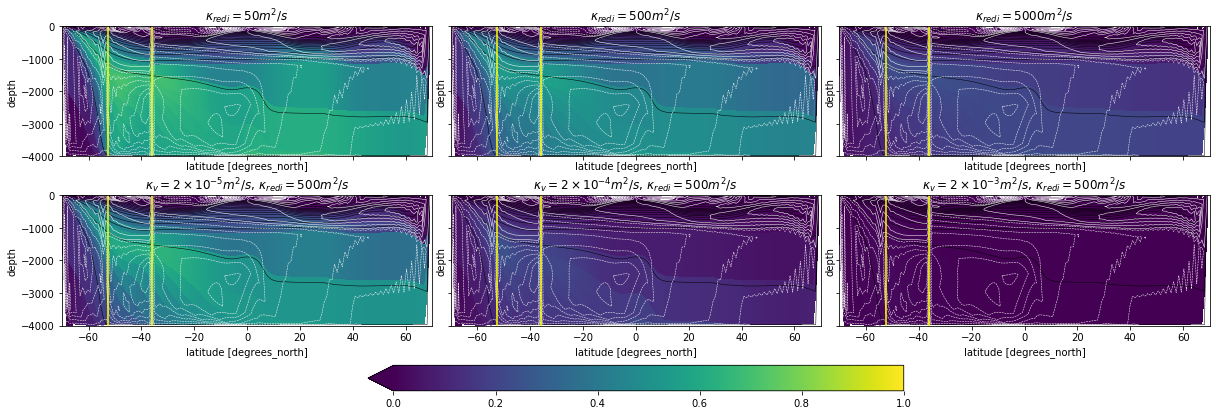

In [15]:
#Plot concentration of NADW in the Pacific ocean
p=pltr.plot_tracers3(dslayers,all_tracers_mean_pac,layers_depth_pac,layers_depth,ROC_pac,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Wide_NADW.eps', bbox_inches='tight')

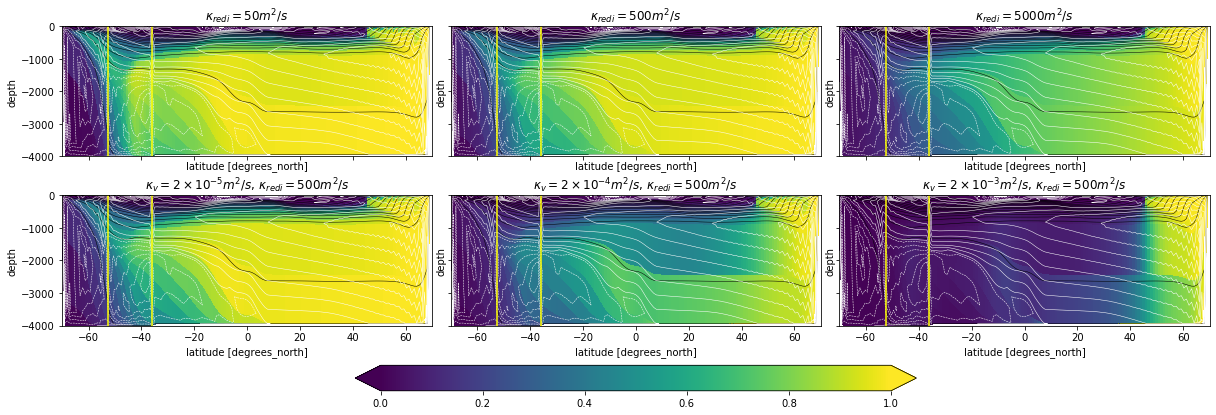

In [16]:
#Plot concentration of NADW in the Atlantic ocean
p=pltr.plot_tracers3(dslayers,all_tracers_mean_atl,layers_depth_atl,layers_depth,ROC_atl,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Narrow_NADW.eps', bbox_inches='tight')

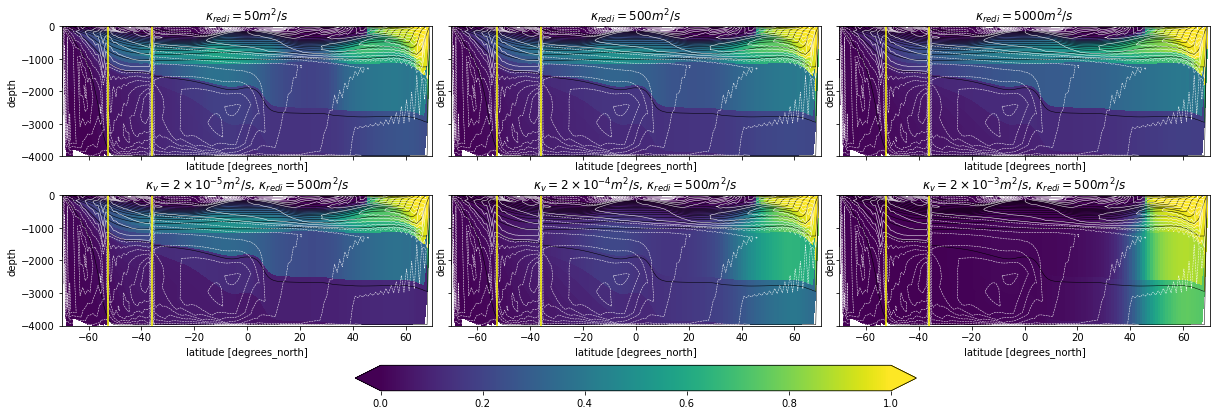

In [17]:
#Plot concentration of NPDW in the Pacific ocean
p=pltr.plot_tracerspac(dslayers,all_tracers_mean_pac,layers_depth_pac,layers_depth,ROC_pac,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Wide_NPDW.eps', bbox_inches='tight')

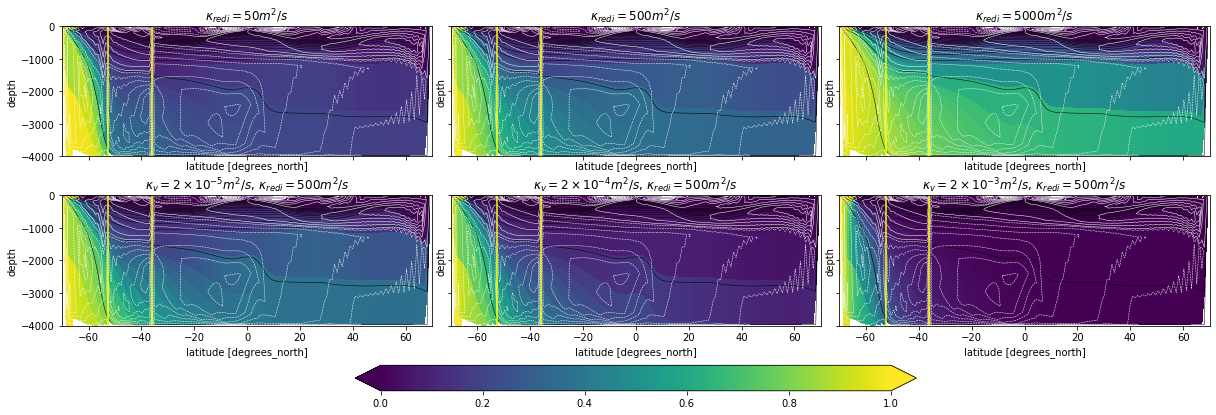

In [18]:
#Plot concentration of NAABW in the Pacific ocean
p=pltr.plot_tracerschannel(dslayers,all_tracers_mean_pac,layers_depth_pac,layers_depth,ROC_pac,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Wide_AABW.eps', bbox_inches='tight')

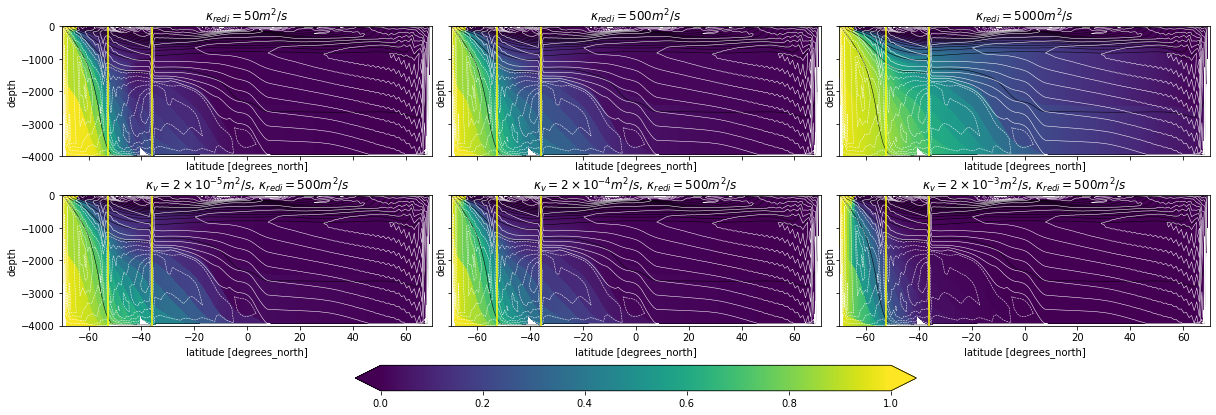

In [19]:
#Plot concentration of AABW in the Atlantic ocean
p=pltr.plot_tracerschannel(dslayers,all_tracers_mean_atl,layers_depth_atl,layers_depth,ROC_atl,ROC_tot,grid)#/3600/24/365
for ax in p.axes.flat:
    fig = ax.get_figure()
fig.subplots_adjust(hspace=0.3, wspace=0.05,bottom = 0.25)
fig.savefig('../tracer_figs/Narrow_AABW.eps', bbox_inches='tight')

/home/spencerj/.conda/envs/pangeo1/lib/python3.6/site-packages/ipykernel/__main__.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


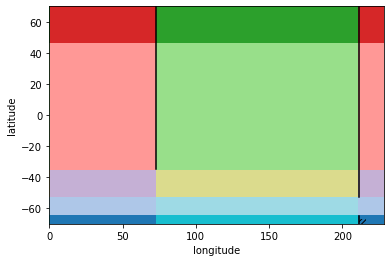

In [3]:
nx=216
ny=144
nz=32
fname='tracer/kh_50/tracerAAn.bin'
ds1=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerAPn.bin'
ds2=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerBA.bin'
ds3=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerBP.bin'
ds4=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerMAn.bin'
ds5=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerMPn.bin'
ds6=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerNA.bin'
ds7=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerNP.bin'
ds8=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerTA.bin'
ds9=np.fromfile(fname,dtype='>f')
fname='tracer/kh_50/tracerTP.bin'
ds10=np.fromfile(fname,dtype='>f')
ds=ds1*0.01+ds2*0.94+ds6+ds5*0.1+ds3*0.46+ds9*0.38+ds7*0.33+ds4*0.88+ds10*0.28+ds8*0.23
ds[ds==0]=np.nan
land=np.reshape(ds,(nz,ny,nx))
land=np.transpose(land,(1,2,0))
indices=list(np.arange(140,215))+list(np.arange(0,140))+list(np.arange(140,160))
ax=plt.pcolor(np.linspace(0,210+0.97*19,235),np.linspace(-70,70,144),land[:,indices,1],cmap='tab20',rasterized=True)
#plt.colorbar(ax)
plt.plot((73,73), (-35, 70), 'k-')
plt.plot((211,211), (-52.5, 70), 'k-')
plt.plot((211,211), (-70, -65), 'k-')
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
errorboxes = []
rect = Rectangle((211,-70), 5, 3,hatch='/////',facecolor='None')
ax2 = plt.axes()
ax2.add_patch(rect)
plt.xlabel('longitude')
plt.ylabel('latitude')
land[10,10,1]
fig = plt.gcf()
fig.savefig('../10boxes.eps', bbox_inches='tight')